##  Data Mining Project on  Loan Status Prediction

In [171]:
import pandas as pd
df = pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


### Handling null values

In [172]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

df['Dependents'].replace(to_replace='3+',value='4',inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Status'].fillna(df['Loan_Status'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [173]:
df['LoanAmount'].value_counts()   # many unique values exist so taking average

120.0    29
110.0    27
100.0    24
187.0    21
150.0    19
         ..
218.0     1
62.0      1
53.0      1
242.0     1
197.0     1
Name: LoanAmount, Length: 232, dtype: int64

In [174]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [175]:
df['Loan_ID'].value_counts()

LP001002    1
LP001183    1
LP001187    1
LP001190    1
LP001203    1
           ..
LP002098    1
LP002100    1
LP002101    1
LP002103    1
LP002989    1
Name: Loan_ID, Length: 981, dtype: int64

In [176]:
# # Loan ID is a unique id . it does not contribute to prediction so dropping this column.
df.drop(columns=['Loan_ID'],inplace=True)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 92.1+ KB


### Convert Categorical attributes to numeric

In [178]:
# using one hot encoding technique
df=pd.get_dummies(df,columns=['Gender']) #  ordering is not present 

from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['Married']=lr.fit_transform(df['Married']) 
df['Loan_Status']=lr.fit_transform(df['Loan_Status'])
df['Dependents']=lr.fit_transform(df['Dependents'])
df['Education']=lr.fit_transform(df['Education'])
df['Self_Employed']=lr.fit_transform(df['Self_Employed'])
df['Property_Area']=lr.fit_transform(df['Property_Area']) # ordering is present 

In [179]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,1,0,1
1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0,0,1
2,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,1,0,1
3,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1,0,1
4,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,1,3,1,1,4009,1777.0,113.00000,360.0,1.0,2,1,0,1
977,1,0,0,0,4158,709.0,115.00000,360.0,1.0,2,1,0,1
978,0,0,0,0,3250,1993.0,126.00000,360.0,1.0,1,1,0,1
979,1,0,0,0,5000,2393.0,158.00000,360.0,1.0,0,1,0,1


### Dimensionality reduction

#### feature selection based on Pearson's correlation coefficient

In [180]:
corr= abs(df.corr()["Loan_Status"])
print(corr)

Married              0.059570
Dependents           0.018397
Education            0.057680
Self_Employed        0.021323
ApplicantIncome      0.023077
CoapplicantIncome    0.050084
LoanAmount           0.053077
Loan_Amount_Term     0.015291
Credit_History       0.380696
Property_Area        0.032649
Loan_Status          1.000000
Gender_Female        0.009116
Gender_Male          0.009116
Name: Loan_Status, dtype: float64


In [ ]:
# Credit_History has the highest correlation with Loan_Status

### Splitting the data in training , validation and testing in ratio 70:15:15

In [181]:
import numpy as np
Y = np.array(df['Loan_Status'])
df.drop(['Loan_Status'],axis=1,inplace=True)
X=np.array(df)
print(X.shape)
print(Y.shape)


from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y,train_size=0.70, random_state=0)
X_Val, X_test, Y_Val, Y_test = train_test_split(X_temp,Y_temp,test_size=0.50, random_state=0)

print(X_train.shape)
print(X_Val.shape)
print(X_test.shape)

(981, 12)
(981,)
(686, 12)
(147, 12)
(148, 12)


### Normalization 

In [182]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_Val=scaler.transform(X_Val)
X_test=scaler.transform(X_test)

## Model building using KNN Classifier

In [183]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### Setting hyperparameter k

In [184]:
k_values = [i for i in range (1,31)]
acc_scores=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)      # Default distance metric used is “minkowski” 
    knn.fit(X_train,Y_train)                     # which gives Euclidean distance when p = 2.
    y_predict=knn.predict(X_Val)
    acc_scores.append(accuracy_score(Y_Val,y_predict))

#### Finding best value of k

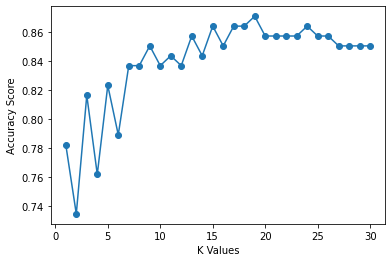

In [185]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.plot(k_values,acc_scores,marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [186]:
import numpy as np
best_index = np.argmax(acc_scores) # index of max element
best_k=k_values[best_index]
print(best_k)

19


In [187]:
knn1=KNeighborsClassifier(n_neighbors=best_k)    
knn1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=19)

### Evaluation of model 

In [188]:
y_predict_train=knn1.predict(X_train)
y_predict_Val=knn1.predict(X_Val)
y_predict_test=knn1.predict(X_test)

In [189]:
print("accuracy of train data: ",accuracy_score(Y_train,y_predict_train))
print("accuracy of Validation data: ",accuracy_score(Y_Val,y_predict_Val))
print("accuracy of test data: ",accuracy_score(Y_test,y_predict_test))

accuracy of train data:  0.8250728862973761
accuracy of Validation data:  0.8707482993197279
accuracy of test data:  0.7972972972972973


In [190]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_predict_test)
print(cm)

[[  7  25]
 [  5 111]]


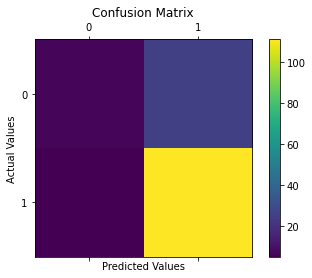

In [191]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
cax=ax.matshow(cm)
fig.colorbar(cax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Model building using decision tree

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=0)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf= DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
# specifying max depth to prevent overfitting

model=clf.fit(X_train,Y_train)

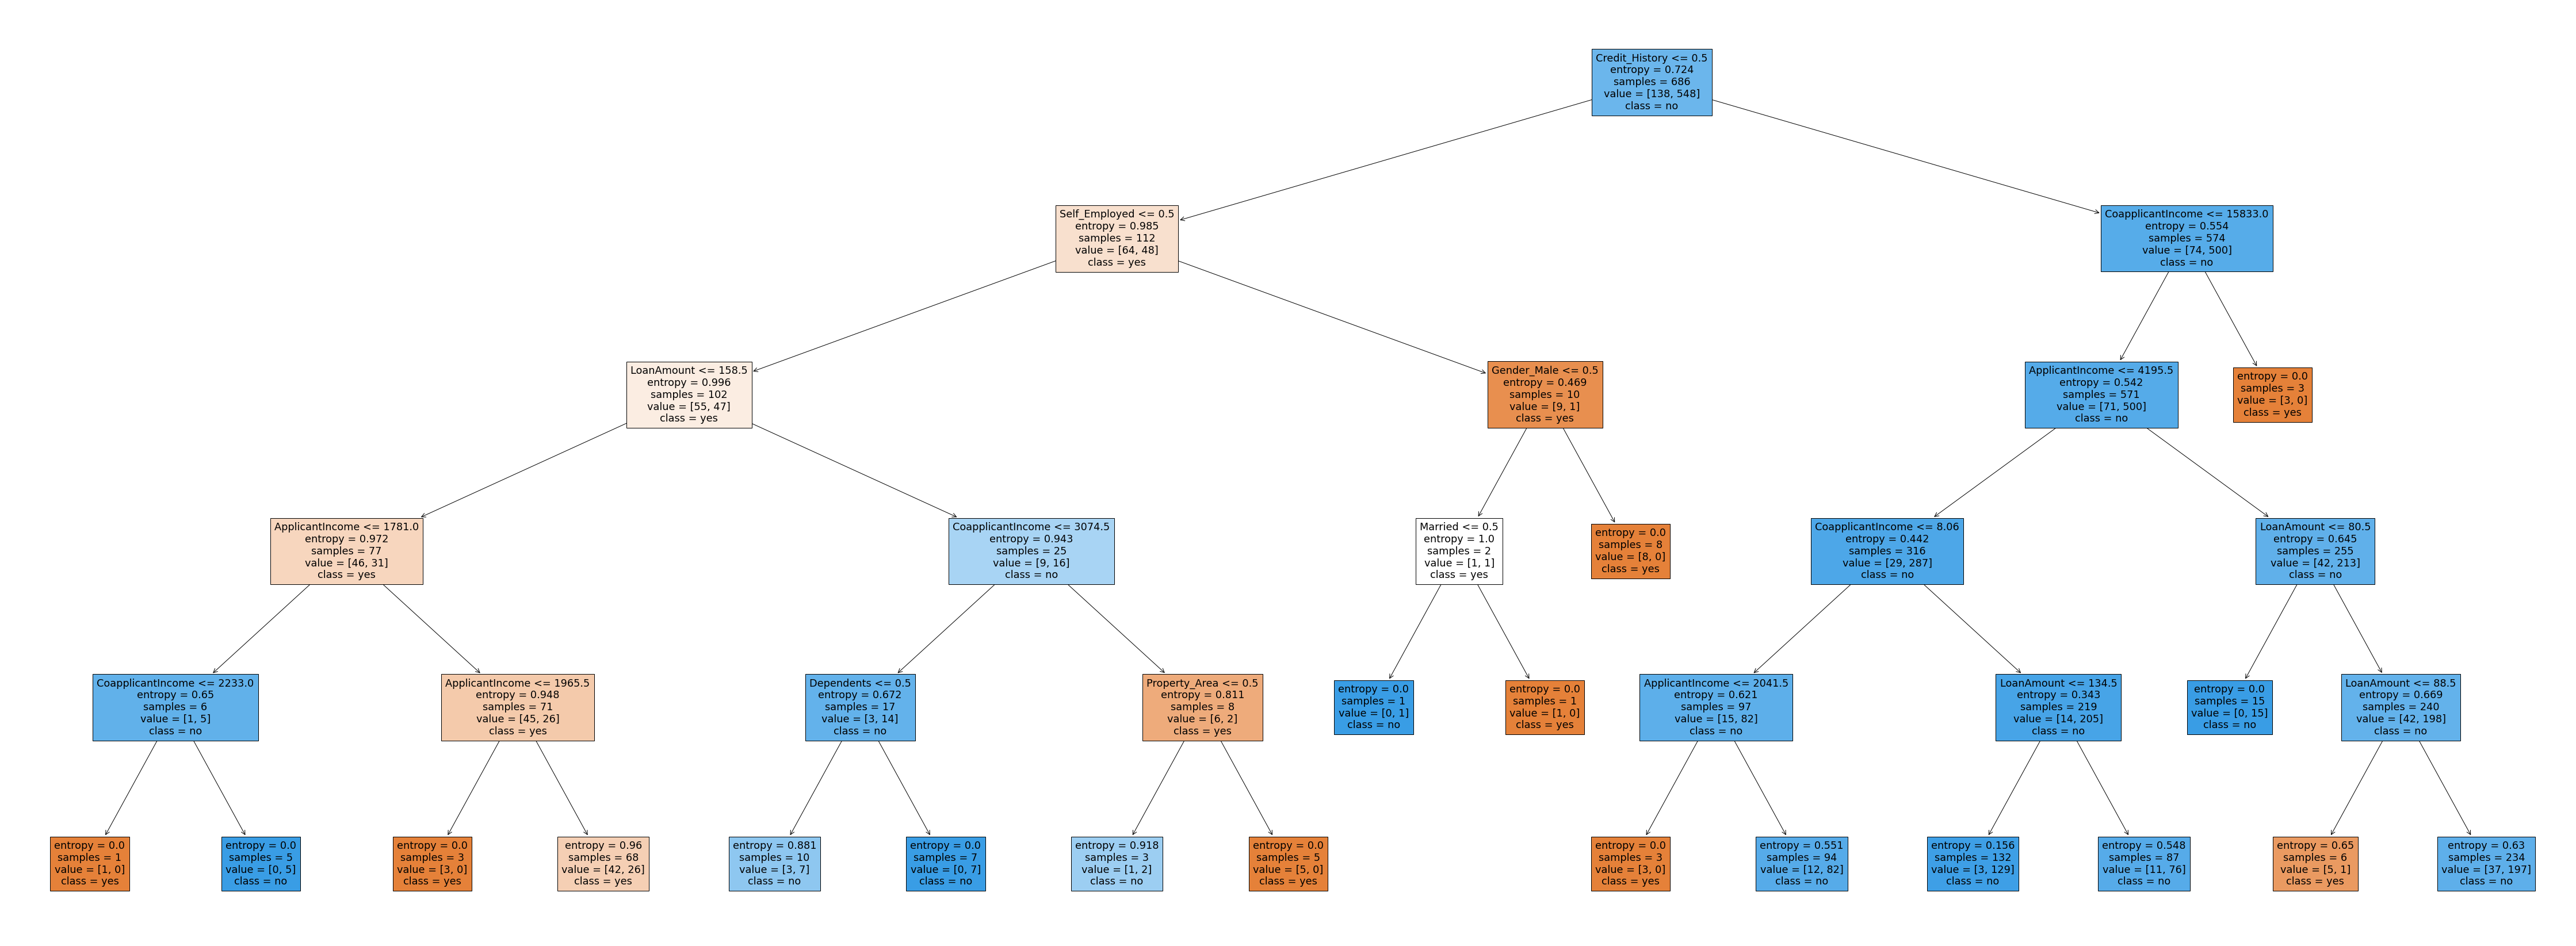

In [193]:
fig=plt.figure(figsize=(80,30))
dec_tree=tree.plot_tree(clf, feature_names= df.columns, class_names=['yes','no'], filled=True)

In [194]:
Y_predict=clf.predict(X_test)
print(Y_predict)
accuracy = accuracy_score(Y_test, Y_predict)
print("accuracy on test data: ",accuracy)

[1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0]
accuracy on test data:  0.8


In [195]:
cm=confusion_matrix(Y_test, Y_predict)
print(cm)

[[ 14  40]
 [ 19 222]]


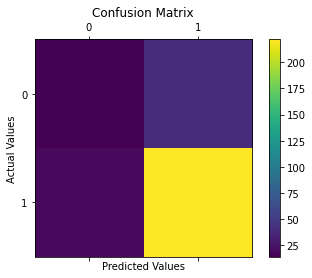

In [196]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
cax=ax.matshow(cm)
fig.colorbar(cax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Model building using Naive bayes Classifier

In [197]:
from sklearn.naive_bayes import GaussianNB
# All features are continuous so we use gaussian distribution 
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [198]:
print(model.class_count_) # number of training samples observed in each class.

[138. 548.]


In [199]:
print(model.var_) # Variance of each feature per class.

[[2.69093016e-01 1.05317199e+00 2.36064240e-01 1.53361027e-01
  1.97549800e+07 2.53755601e+07 7.50737709e+03 3.33955553e+03
  2.73031264e-01 7.12697301e-01 1.86074742e-01 1.86074742e-01]
 [2.46768623e-01 1.08485270e+00 1.90159321e-01 1.30276668e-01
  2.54979852e+07 3.59288236e+06 5.38019526e+03 4.12557360e+03
  1.04263029e-01 6.62906936e-01 1.83685880e-01 1.83685880e-01]]


In [200]:
print(model.theta_)  # mean of each feature per class.

[[5.72463768e-01 7.17391304e-01 3.04347826e-01 1.52173913e-01
  5.21029710e+03 2.02706522e+03 1.50449944e+02 3.46347826e+02
  5.36231884e-01 1.00724638e+00 2.02898551e-01 7.97101449e-01]
 [6.66058394e-01 7.82846715e-01 2.09854015e-01 1.20437956e-01
  5.11943796e+03 1.41107285e+03 1.40007552e+02 3.42496350e+02
  9.12408759e-01 1.07481752e+00 1.98905109e-01 8.01094891e-01]]


In [201]:
y_predict=model.predict(X_test)
y_predict_train=model.predict(X_train)

In [202]:
accuracy_train=accuracy_score(Y_train,y_predict_train)
print("accuracy of train data :",accuracy_train)

accuracy_test=accuracy_score(Y_test,y_predict)
print("accuracy of test data :",accuracy_test)

accuracy of train data : 0.826530612244898
accuracy of test data : 0.7864406779661017


In [204]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_predict)
print(cm)

[[ 17  37]
 [ 26 215]]


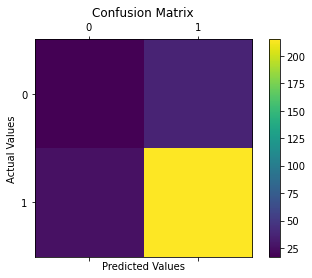

In [205]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
cax=ax.matshow(cm)
fig.colorbar(cax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()